In [ ]:
a = 3 + 4 + 5
a

In [ ]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("./sample.jpg"))

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes, VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

import http.client, urllib.request, urllib.parse, urllib.error, base64, json, io, tempfile, requests, cv2

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def imread_web(url):
    res = requests.get(url)
    img = None
    with tempfile.NamedTemporaryFile(dir='./') as fp:
        fp.write(res.content)
        fp.file.seek(0)
        img = cv2.imread(fp.name)
    return img

if __name__ == "__main__":
    # 別途指定する値に書き換える
    subscription_key = "212c45bfb472427a8f00b7aba173c458"
    endpoint = "takano0624.cognitiveservices.azure.com"

    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': subscription_key,
    }

    params = urllib.parse.urlencode({
        'visualFeatures': 'Objects',
        'language': 'en',
    })

    # 好きな画像のURLに書き換える
    # 物体の全体が映っている写真(JPEG, PNGなど)
    image_url = 'http://blog-imgs-36.fc2.com/d/r/i/drinkactman/PICT0126A.jpg'

    body = { 'url': image_url }
    body = json.dumps(body)

    try:
        conn = http.client.HTTPSConnection(endpoint)
        conn.request("POST", "/vision/v2.1/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = json.loads(response.read())
        print(json.dumps(data, indent=2))
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

    raw_img = imread_web(image_url)
    raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
    
    json_dict = json.loads(json.dumps(data, indent=2))
    for item in json_dict["objects"]:
        x = item["rectangle"]["x"]
        y = item["rectangle"]["y"]
        w = item["rectangle"]["w"]
        h = item["rectangle"]["h"]
        edited_img = cv2.putText(raw_img, item["object"], (item["rectangle"]["x"]+5, item["rectangle"]["y"]+35), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 3, cv2.LINE_AA)
        edited_img = cv2.rectangle(edited_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    plt.figure(figsize=(3, 3), dpi=300)
    plt.imshow(edited_img)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)    
    plt.show()

In [8]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import requests, json, urllib.request,os
from PIL import Image, ImageDraw, ImageFont
import cv2
from urllib3.util import Retry
from requests.adapters import HTTPAdapter
import json
import http.client, urllib.request, urllib.parse, urllib.error, base64

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def FaceRecog(localfileName):
    # 別途指定する値に書き換える
    subscription_key = '2b4f418c523e436bad5148692996507b'
    face_api_url = 'https://cognitiveface0719.cognitiveservices.azure.com/face/v1.0/detect'

    # 顔認識させる画像
    image_file_path = localfileName
    image_file = open(image_file_path, "rb")
    body = image_file.read()
    image_file.close()

    # ヘッダ設定
    headers = {
        'Content-Type' : 'application/octet-stream',
        'Ocp-Apim-Subscription-Key': subscription_key,
    }

    # パラメーターの設定
    params = urllib.parse.urlencode({
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
        'recognitionModel' : 'recognition_04',
        'returnRecognitionModel' : 'false',
        'detectionModel' : 'detection_01',
        'faceIdTimeToLive' : '86400',
    })

    # POSTリクエストの試行
    try:
        request = requests.post(face_api_url, params=params, headers=headers, data=body, timeout=30)
        response = request.json()

        raw_img = cv2.imread(localfileName)
        raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

        for item in response:
            x = item["faceRectangle"]["left"]
            y = item["faceRectangle"]["top"]
            w = item["faceRectangle"]["width"]
            h = item["faceRectangle"]["height"]

            raw_img = cv2.putText(raw_img, "age:"+str(int(item["faceAttributes"]["age"])), (x+6, y+22), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 1, cv2.LINE_AA)
            raw_img = cv2.putText(raw_img, "gen:"+str(item["faceAttributes"]["gender"]), (x+6, y+46), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 1, cv2.LINE_AA)
            raw_img = cv2.rectangle(raw_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # figsizeとdpiを変化させることで、写真の大きさを変更することが可能
        plt.figure(figsize=(4, 4), dpi=1000)
        plt.imshow(raw_img)
        plt.xticks(fontsize=3)
        plt.yticks(fontsize=3)    
        plt.show()

    except requests.exceptions.ConnectionError:
        print("Site not rechable", face_api_url)
        
if __name__ == "__main__":
    FaceRecog("bear1.jpg")
    FaceRecog("bear1-1.jpg")



Site not rechable https://cognitiveface0719.cognitiveservices.azure.com/face/v1.0/detect
Site not rechable https://cognitiveface0719.cognitiveservices.azure.com/face/v1.0/detect


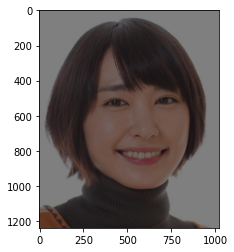

In [2]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2 # OpenCVのインポート
 
img = cv2.imread('sample1.jpg') # 画像の読み出し
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) # 色空間をBGRからHSVに変換
h_deg = 0 #色相(Hue)の回転度数
s_mag = 1 # 彩度(Saturation)の倍率
v_mag = 0.5 # 明度(Value)の倍率
 
img_hsv[:,:,(0)] = img_hsv[:,:,(0)]+h_deg # 色相の計算
img_hsv[:,:,(1)] = img_hsv[:,:,(1)]*s_mag # 彩度の計算
img_hsv[:,:,(2)] = img_hsv[:,:,(2)]*v_mag # 明度の計算
img_bgr = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR) # 色空間をHSVからBGRに変換
 
cv2.imwrite('sample1_value.jpg', img_bgr) # 画像の保存

plt.imshow(mpimg.imread("./sample1_value.jpg"))